# 행렬 테두리 회전하기

# 문제
rowxs x columns 크기의 행렬이 있을 때 x1 행 y1 열부터 x2 행 y2 열까지의 영역에 해당하는 <br>
직사각형에서 테두리에 있는 숫자들을 한 칸씩 시계방향으로 회전한다<br>
행렬의 세로 길이rows, 가로 길이 columns, 그리고 회전들의 목록 queries가 주어질 때, <br>
각 회전들을 배열에 적용한 뒤, 그 회전에 의해 위치가 바뀐 숫자들 중 가장 작은 숫자들을 <br>
순서대로 배열에 담아 return 해라
<br><br>
input : rows, columns, queries, output : 리스트
#### <조건>
 1. rows는 2 이상 100 이하인 자연수
 2. columns는 2 이상 100 이하인 자연수
 3. 아무 회전도 하지 않았을 때, i 행 j 열에 있는 숫자는 ((i-1) x columns + j)
 4. x1 행 y1 열부터 x2 행 y2 열까지 영역의 테두리를 시계방향으로 회전
 
#### <예시>
input : rows = 6, columns = 6, queries = [[2,2,5,4],[3,3,6,6],[5,1,6,3]]
<br><br>
result : [8, 10, 25]
<br><br>
 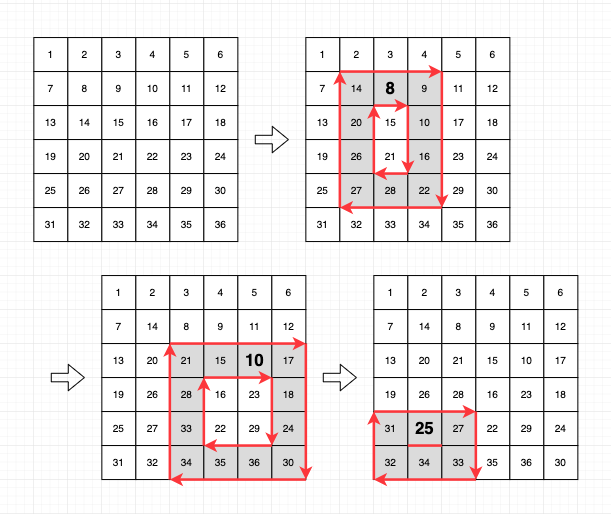
 
https://programmers.co.kr/learn/courses/30/lessons/77485

# 풀이
 1. 이전의 회전한 행과 열, 그 값을 저장하는 prev_dict선언
 2. 회전할 대상이 되는 행과 열, 그 값을 계산해서 select_list에 저장
    이 때 이전에 회전을 했던 값은 prev_dict에서 값을 가지고옴
 3. 2번에서 추출한 회전할 대상이 되는 값들을 한칸식 이동시킴
 4. select_list를 값기준으로 정렬한 후 최소 값을 구함
 5. 모든 query를 다 수행할때까지 반복

In [105]:
def solution(rows, columns, queries):
    answer = []
    prev_dict = dict()
    
    while(queries):
        query = queries.pop(0)
        
        select_list = [[(query[0], i), prev_dict[(query[0], i)]] if (query[0], i) in prev_dict else [(query[0], i), (query[0]-1)*columns+i] for i in range(query[1], query[-1]+1)]
        select_list += [[(i, query[-1]), prev_dict[(i, query[-1])]] if (i, query[-1]) in prev_dict else [(i, query[-1]), (i-1)*columns+query[-1]] for i in range(query[0]+1, query[2])]
        select_list += [[(query[2], i), prev_dict[(query[2], i)]] if (query[2], i) in prev_dict else [(query[2], i), (query[2]-1)*columns+i] for i in range(query[-1], query[1]-1, -1)]
        select_list += [[(i,query[1]), prev_dict[(i,query[1])]] if (i, query[1]) in prev_dict else [(i,query[1]), (i-1)*columns+query[1]] for i in range(query[2]-1, query[0], -1)]               
        
        end = select_list[-1][-1]
        
        for i in range(1, len(select_list)):
            prev_dict[select_list[i][0]] = select_list[i-1][-1]
        prev_dict[select_list[0][0]] = end
        
        select_list = sorted(select_list, key=lambda x: x[-1])
        answer.append(select_list[0][-1])
        
    return answer

In [106]:
rows = 6
columns = 6
queries = [[2,2,5,4],[3,3,6,6],[5,1,6,3]]

solution(rows, columns, queries)

[8, 10, 25]